## アフィン変換（回転）
反時計回りに３０度回転<br>
反時計回りに３０度回転かつ中心の座標は固定

True

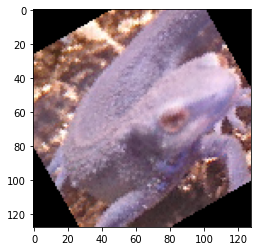

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def affine(img, a, b, c, d, tx, ty):
    H, W, C = img.shape
    
    # temporary image
    img = np.zeros((H+2, W+2, C), dtype=np.float32)
    img[1:H+1, 1:W+1] = _img
    
    # get shape of new image
    H_new = np.round(H).astype(np.int)
    W_new = np.round(W).astype(np.int)
    out = np.zeros((H_new, W_new, C), dtype = np.float32)
    
    # get position of new image
    x_new = np.tile(np.arange(W_new), (H_new, 1))
    y_new = np.arange(H_new).repeat(W_new).reshape(H_new, -1)
    
    # get position of original image by affine
    abcd = a*d - b*c
    x = np.round((d*x_new - b*y_new)/ abcd).astype(np.int) - tx +1
    y = np.round((-c*x_new + a*y_new)/abcd).astype(np.int) - ty + 1
    
    # xを0-Wの範囲に収めるような処理
    #x = np.minimum(np.maximum(x, 0), W+1).astype(np.int)
    # yを0-Wの範囲に収めるような処理
    #y = np.minimum(np.maximum(y,0), H+1).astype(np.int)
    
    # adjust center by affine
    dcx = (x.max()+x.min())//2 - W//2
    dcy = (y.max()+y.min())//2 - H//2
    
    x -= dcx
    y -= dcy
    
    x = np.clip(x, 0, W+1)
    y = np.clip(y, 0, H+1)
    
    # assign pixcel
    # 表示している枠をずらしているイメージ、枠の座標がx,yになるように計算している
    out [y_new, x_new] = img[y,x]
    out = out.astype(np.uint8)
    
    return out

_img =cv2.imread('../imori.jpg').astype(np.float32)

A = 30
theta = -np.pi*A/180  # 30°をπで表している

out = affine(_img, a=np.cos(theta), b=-np.sin(theta), c=np.sin(theta), d=np.cos(theta), tx=0, ty=0)

plt.imshow(out)
cv2.imwrite('out30.jpg', out)

    
    